# Visualizing chess data

## Introduction

### The data consists of slight more than 20000 games

The following is a quick EDA on the chess set

In [177]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [178]:
df = pd.read_csv('../data/games.csv')

In [179]:
# Inspect columns
df.columns
#data.dtypes

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [180]:
# Look for Null values.
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [181]:
%%capture
# Print different amount values in the columns
for col in df.columns:
    print("Number of unique values in " + str(col) + ":  \n", len(df[col].unique()), '\n')

Text(0, 0.5, 'Number of instances')

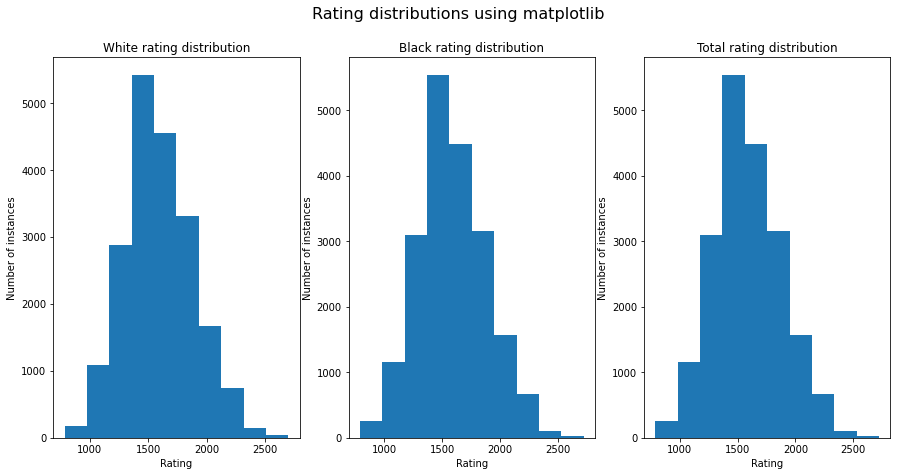

In [182]:
fig, axs = plt.subplots(1, 3, figsize=(15,7))
axs[0].hist(df['white_rating'])
axs[0].set_title('White rating distribution')
axs[0].set_xlabel('Rating')
axs[0].set_ylabel('Number of instances')

fig.suptitle('Rating distributions using matplotlib', fontsize=16)

axs[1].hist(df['black_rating'])
axs[1].set_xlabel('Rating')
axs[1].set_title('Black rating distribution')
axs[1].set_ylabel('Number of instances')

axs[2].hist(df['black_rating'] & data ['black_rating'])
axs[2].set_xlabel('Rating')
axs[2].set_title('Total rating distribution')
axs[2].set_ylabel('Number of instances')

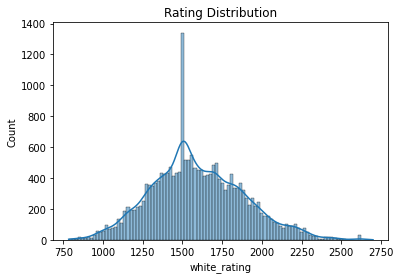

In [183]:
sns.histplot(data=df, x=df["white_rating"] , kde=True, bins = 100).set_title('Rating Distribution');


There is a large amount of ratings at 1500. Probably due to this being the starting rating.

In [184]:
df['white_rating'].value_counts()[0:3]

1500    812
1480     51
1400     48
Name: white_rating, dtype: int64

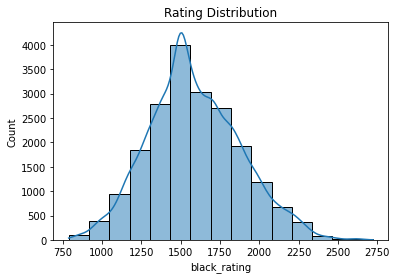

In [185]:
# Plotting with sns to try another way and see the kde.

sns.histplot(data=df, x=df["black_rating"] , kde=True, bins = 15).set_title('Rating Distribution');

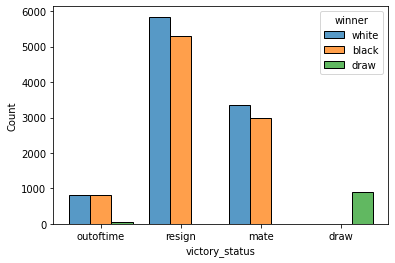

In [186]:
# Comparing different victory statuses
sns.histplot(data=df, x=df["victory_status"], hue = 'winner', multiple="dodge", shrink=.8);

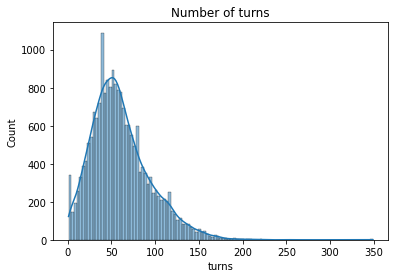

In [187]:
# Looking at the distribution of the number of turns.
sns.histplot(data=df, x=df["turns"] , kde=True).set_title('Number of turns');

Get information for longest and highest rated game.

In [188]:
#longest_game = data.loc[data['turns'].max()]
longest_game_index = df["turns"].idxmax()
longest_game = df.iloc[longest_game_index]

# Highest rating will be the accumulative highest rating for the two players

df['total_rating'] = df['white_rating'] + df['black_rating']
highest_game_index = df['total_rating'].idxmax()
highest_rated_game = df.iloc[highest_game_index]